<a href="https://colab.research.google.com/github/antonioferreira2005/6-7-edition/blob/main/churn_28_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [3]:
df = pd.read_csv('/content/churn (1).csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
new_column_names = ["Customer ID", "Gender", "Senior Citizen", "Partner", "Dependents",
                    "Tenure", "Phone Service", "Multiple Lines", "Internet Service",
                    "Online Security", "Online Backup", "Device Protection", "Tech Support",
                    "Streaming TV", "Streaming Movies", "Contract", "Paperless Billing",
                    "Payment Method", "Monthly Charges", "Total Charges", "Churn"]

df.columns = new_column_names

df.set_index("Customer ID", inplace=True)

df['Total Charges'] = df['Total Charges'].replace(' ', None).astype(float)

df.fillna(0.0, inplace=True)

df['Senior Citizen'] = df['Senior Citizen'].map({0: 'No', 1: 'Yes'})

In [5]:
df

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
Customer ID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


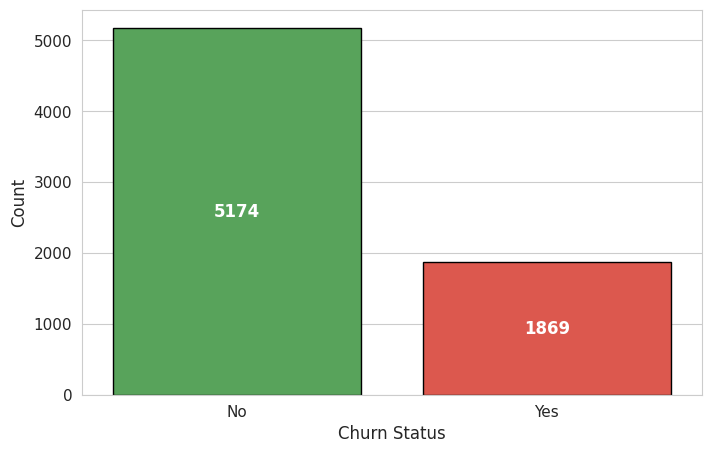

In [6]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.set_palette(["#4CAF50", "#F44336"])

ax = sns.countplot(x='Churn', hue='Churn', data=df, palette=["#4CAF50", "#F44336"], edgecolor='black', legend=False)

plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', fontsize=12, fontweight='bold', color='white')

plt.show()

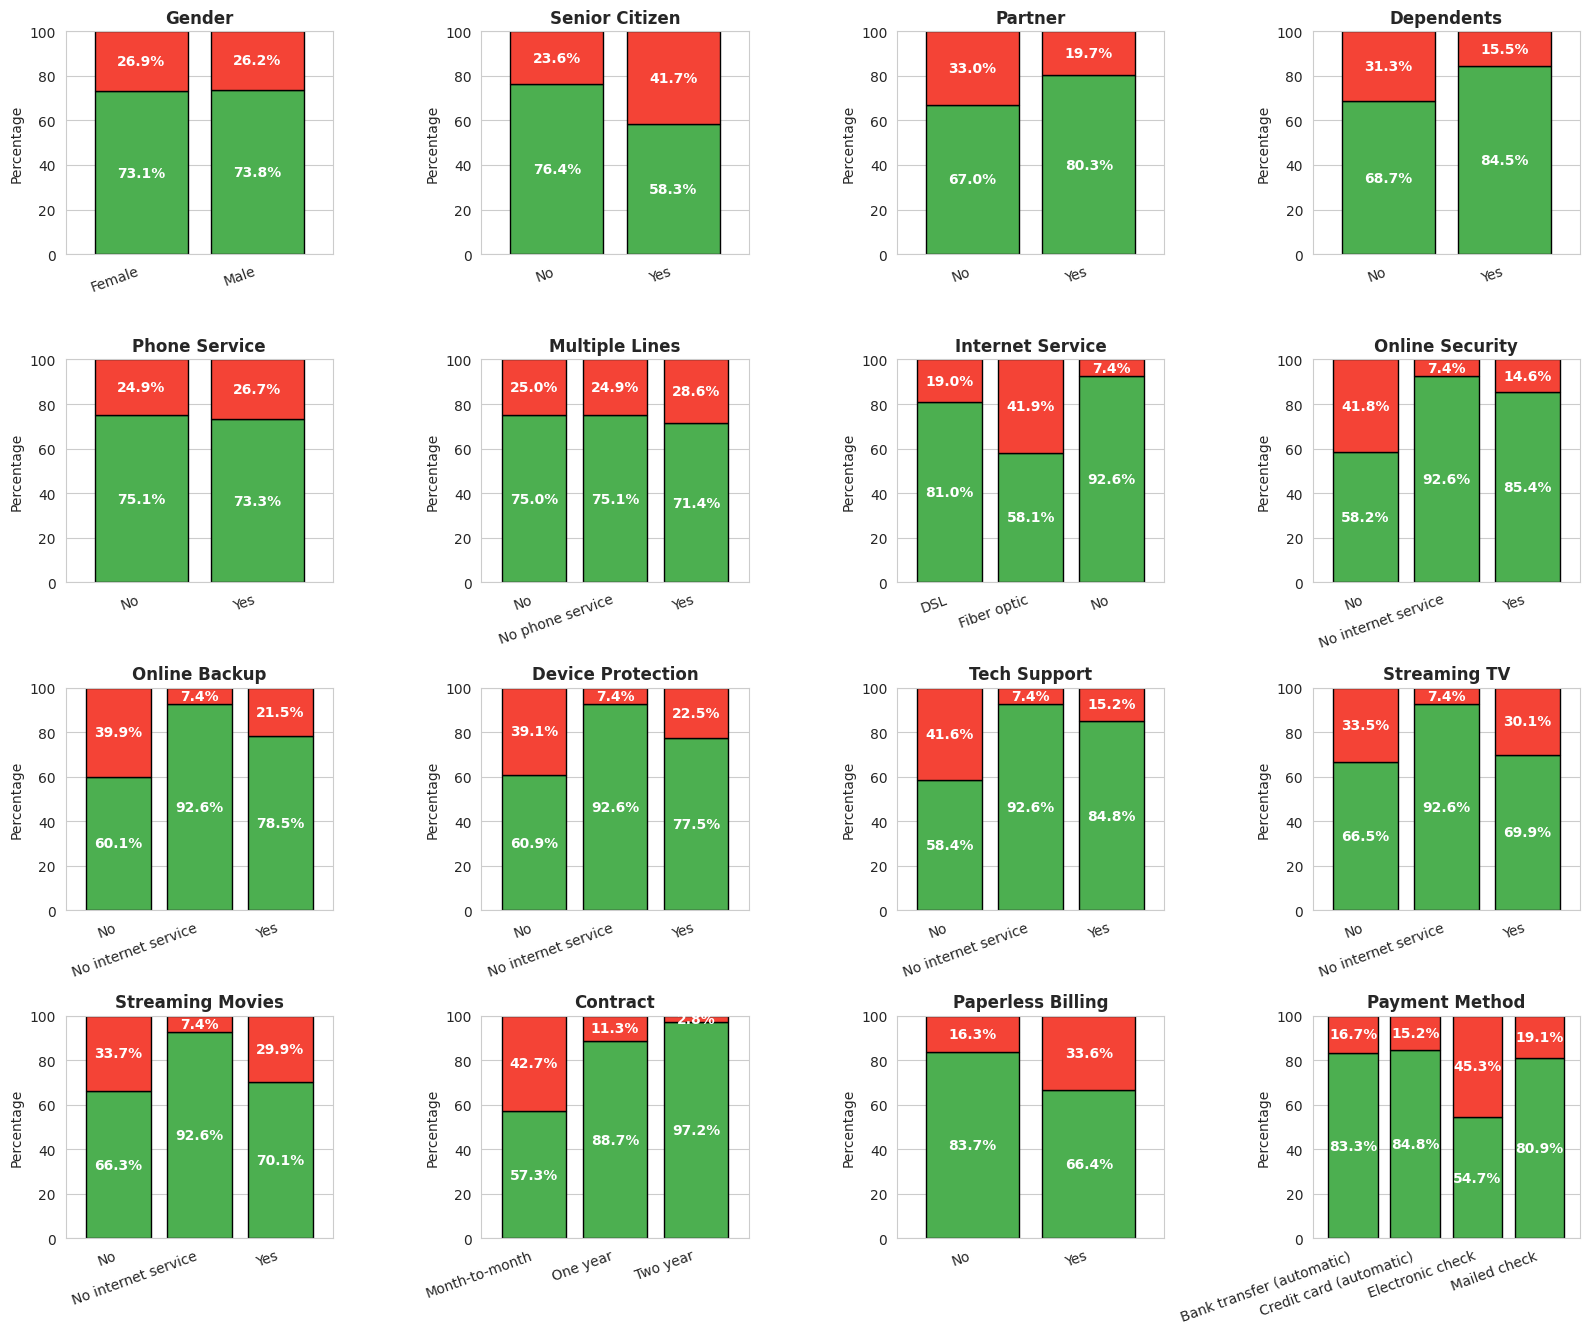

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in ['customerID', 'Churn']]

num_cols = len(categorical_cols)
rows, cols = 4, 4

sns.set_style("whitegrid")
fig, axes = plt.subplots(rows, cols, figsize=(16, 14))

for idx, col in enumerate(categorical_cols):
    row = idx // cols
    col_idx = idx % cols
    ax = axes[row, col_idx]

    churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

    churn_percentages.plot(kind='bar', stacked=True, color=["#4CAF50", "#F44336"], edgecolor='black', ax=ax, width=0.8)

    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage')

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x()
        y = p.get_y()
        ax.annotate(f'{height:.1f}%',
                    (x + width / 2, y + height / 2),
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')

    ax.set_ylim(0, 100)
    ax.get_legend().remove()

    for label in ax.get_xticklabels():
        label.set_rotation(20)
        label.set_ha('right')

for i in range(num_cols, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

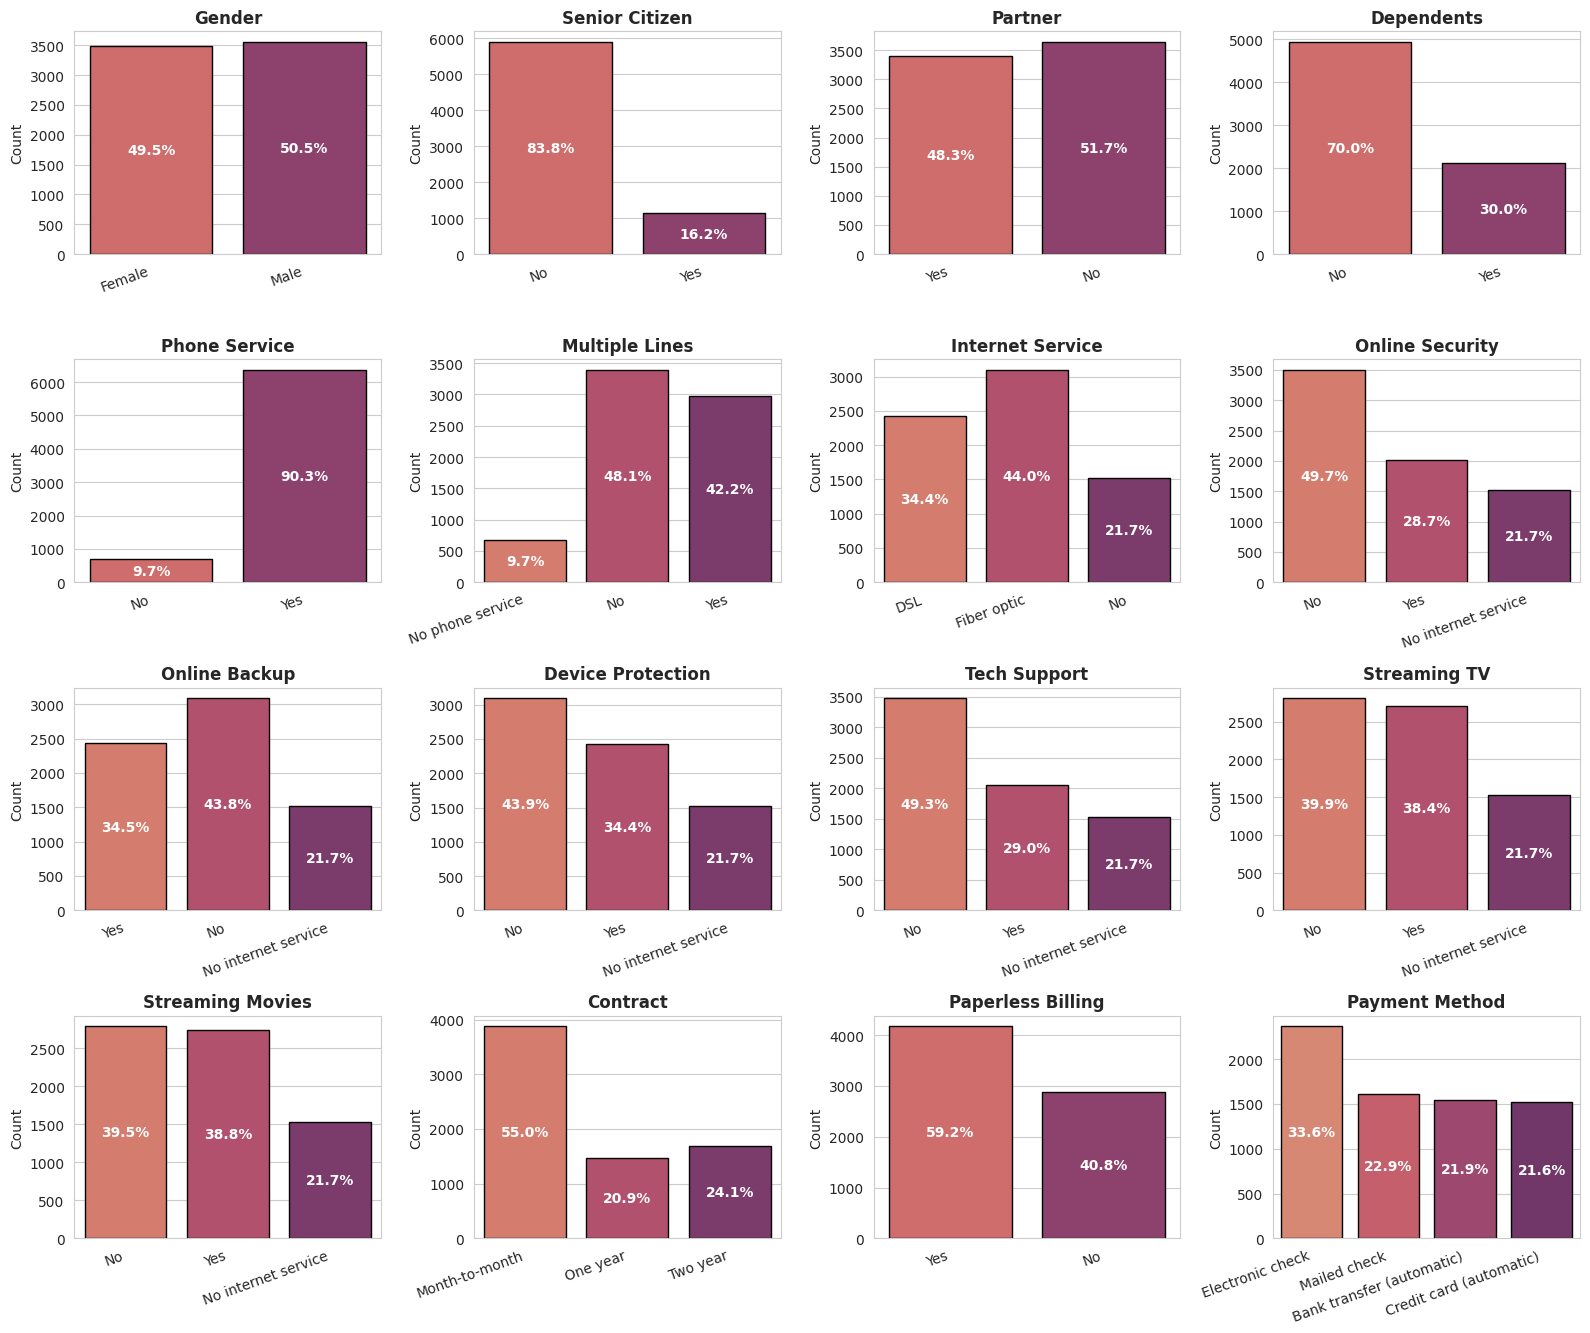

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in ['customerID', 'Churn']]

num_cols = len(categorical_cols)
rows, cols = 4, 4

sns.set_style("whitegrid")
fig, axes = plt.subplots(rows, cols, figsize=(16, 14))

for idx, col in enumerate(categorical_cols):
    row = idx // cols
    col_idx = idx % cols
    ax = axes[row, col_idx]

    sns.countplot(data=df, x=col, hue=col, legend=False, palette='flare', edgecolor='black', ax=ax)
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    total = len(df[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')

    for label in ax.get_xticklabels():
        label.set_rotation(20)
        label.set_ha('right')

for i in range(num_cols, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

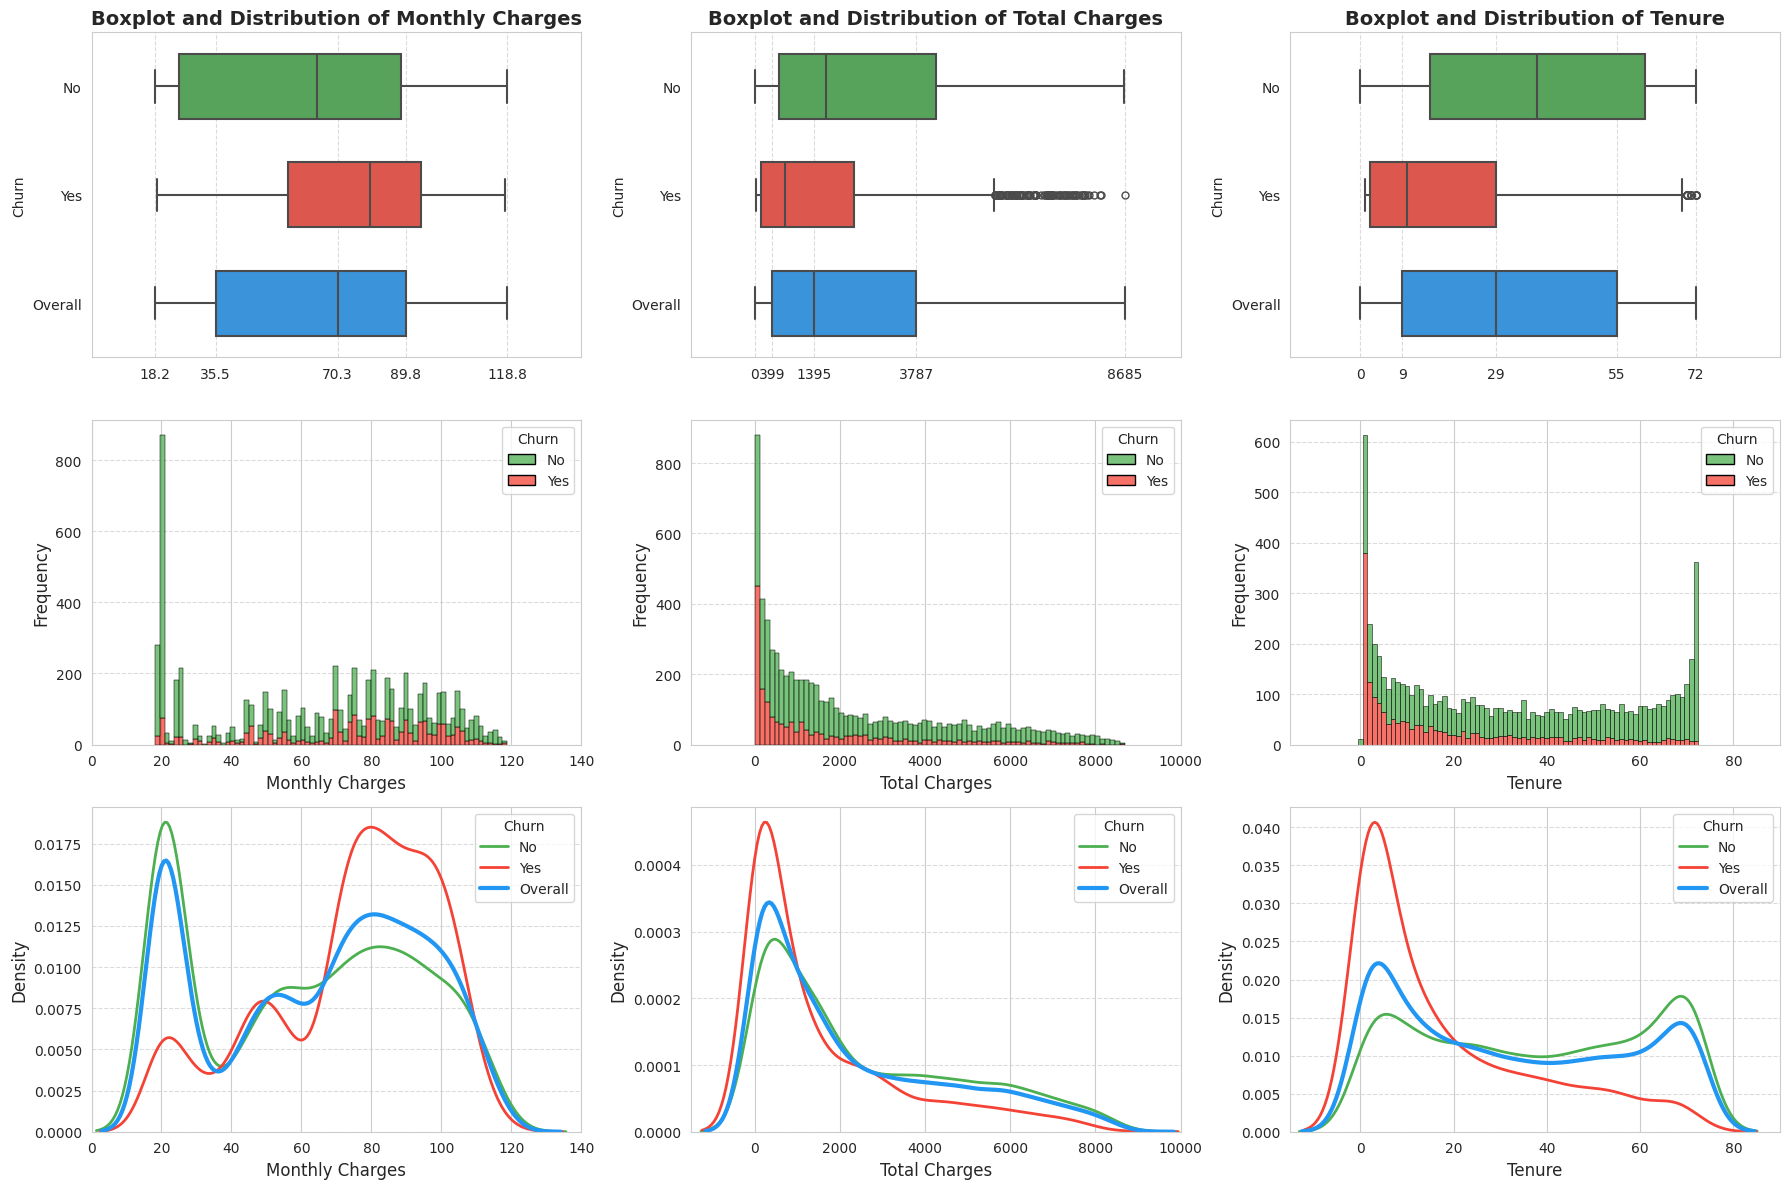

In [10]:
charges_cols = ['Monthly Charges', 'Total Charges']
color_palette = {'Yes': '#F44336', 'No': '#4CAF50', 'Overall': '#2196F3'}

fig = plt.figure(figsize=(18, 12))

x_limits = {
    'Monthly Charges': (0,140),
    'Total Charges': (-1500, 10000),
    'Tenure': (-15, 90)
}

for i, col in enumerate(charges_cols):
    df_boxplot = df.copy()
    df_boxplot['Overall'] = 'Overall'
    boxplot_data = pd.concat([
        df_boxplot[[col, 'Churn']].reset_index(drop=True),
        df_boxplot[[col, 'Overall']].rename(columns={'Overall': 'Churn'}).reset_index(drop=True)
    ], ignore_index=True)

    ax1 = plt.subplot2grid((3, 3), (0, i))
    sns.boxplot(
        data=boxplot_data,
        x=col,
        y='Churn',
        hue='Churn',
        palette=color_palette,
        width=0.6,
        fliersize=5,
        linewidth=1.5,
        flierprops={'marker': 'o', 'color': 'black', 'markersize': 5},
        legend=False,
        ax=ax1
    )
    ax1.set_title(f'Boxplot and Distribution of {col}', fontsize=14, fontweight='bold')
    ax1.set_xlabel('')
    ax1.grid(True, which='major', axis='x', linestyle='--', alpha=0.7)

    overall_quantiles = df[col].quantile([0.0, 0.25, 0.5, 0.75, 1.0]).values
    ax1.set_xticks(overall_quantiles)
    ax1.set_xlim(x_limits[col])

    ax2 = plt.subplot2grid((3, 3), (1, i))
    sns.histplot(
        data=df,
        x=col,
        hue='Churn',
        bins=75,
        discrete=False,
        palette=color_palette,
        edgecolor='black',
        ax=ax2,
        multiple='stack'
    )
    ax2.set_xlabel(col, fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    ax2.set_xlim(x_limits[col])

    ax3 = plt.subplot2grid((3, 3), (2, i))
    sns.kdeplot(df[df['Churn'] == 'No'][col], color=color_palette['No'], linewidth=2, label='No', ax=ax3)
    sns.kdeplot(df[df['Churn'] == 'Yes'][col], color=color_palette['Yes'], linewidth=2, label='Yes', ax=ax3)
    sns.kdeplot(df[col], color=color_palette['Overall'], linewidth=3, label='Overall', ax=ax3)
    ax3.set_xlabel(col, fontsize=12)
    ax3.set_ylabel('Density', fontsize=12)
    ax3.legend(title='Churn')
    ax3.grid(axis='y', linestyle='--', alpha=0.7)
    ax3.set_xlim(x_limits[col])

tenure_col = 'Tenure'
df_boxplot = df.copy()
df_boxplot['Overall'] = 'Overall'
boxplot_data = pd.concat([
    df_boxplot[[tenure_col, 'Churn']].reset_index(drop=True),
    df_boxplot[[tenure_col, 'Overall']].rename(columns={'Overall': 'Churn'}).reset_index(drop=True)
], ignore_index=True)

ax4 = plt.subplot2grid((3, 3), (0, 2))
sns.boxplot(
    data=boxplot_data,
    x=tenure_col,
    y='Churn',
    hue='Churn',
    palette=color_palette,
    width=0.6,
    fliersize=5,
    linewidth=1.5,
    flierprops={'marker': 'o', 'color': 'black', 'markersize': 5},
    legend=False,
    ax=ax4
)
ax4.set_title(f'Boxplot and Distribution of {tenure_col}', fontsize=14, fontweight='bold')
ax4.set_xlabel('')
ax4.grid(True, which='major', axis='x', linestyle='--', alpha=0.7)

overall_quantiles_tenure = df[tenure_col].quantile([0.0, 0.25, 0.5, 0.75, 1.0]).values
ax4.set_xticks(overall_quantiles_tenure)
ax4.set_xlim(x_limits['Tenure'])

ax5 = plt.subplot2grid((3, 3), (1, 2))
sns.histplot(
    data=df,
    x=tenure_col,
    hue='Churn',
    bins=df[tenure_col].nunique(),
    discrete=True,
    palette=color_palette,
    edgecolor='black',
    ax=ax5,
    multiple='stack'
)
ax5.set_xlabel(tenure_col, fontsize=12)
ax5.set_ylabel('Frequency', fontsize=12)
ax5.grid(axis='y', linestyle='--', alpha=0.7)
ax5.set_xlim(x_limits['Tenure'])

ax6 = plt.subplot2grid((3, 3), (2, 2))
sns.kdeplot(df[df['Churn'] == 'No'][tenure_col], color=color_palette['No'], linewidth=2, label='No', ax=ax6)
sns.kdeplot(df[df['Churn'] == 'Yes'][tenure_col], color=color_palette['Yes'], linewidth=2, label='Yes', ax=ax6)
sns.kdeplot(df[tenure_col], color=color_palette['Overall'], linewidth=3, label='Overall', ax=ax6)
ax6.set_xlabel(tenure_col, fontsize=12)
ax6.set_ylabel('Density', fontsize=12)
ax6.legend(title='Churn')
ax6.grid(axis='y', linestyle='--', alpha=0.7)
ax6.set_xlim(x_limits['Tenure'])

plt.tight_layout()
plt.show()

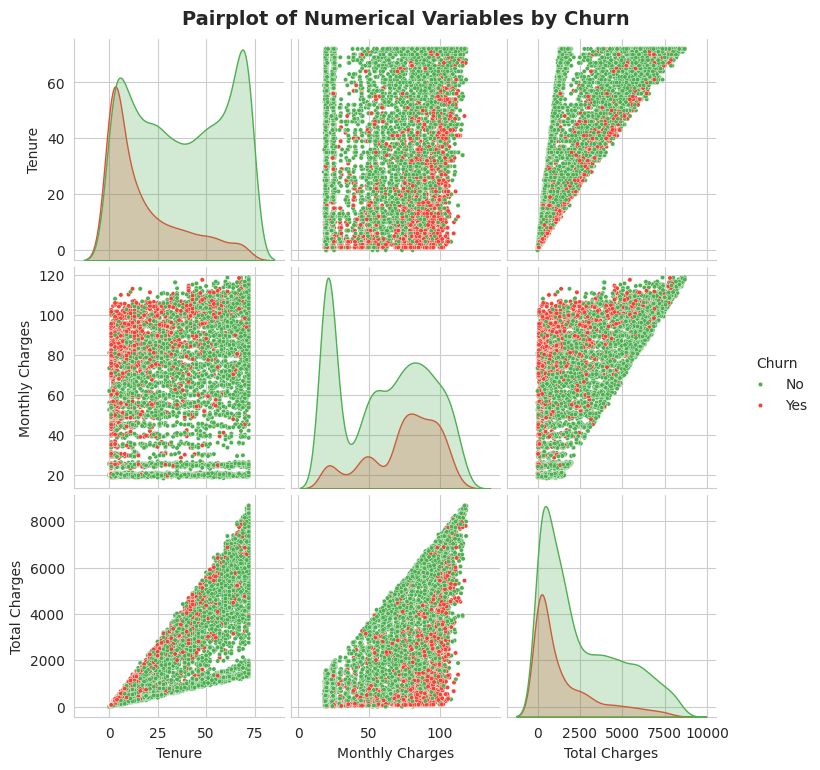

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_churn = numerical_cols + ['Churn']

sns.pairplot(df[numerical_cols_churn],
            hue="Churn",
            palette={'Yes': '#F44336', 'No': '#4CAF50'},
            plot_kws={'s': 10})

plt.suptitle("Pairplot of Numerical Variables by Churn", fontsize=14, fontweight='bold', y=1.02)
plt.show()

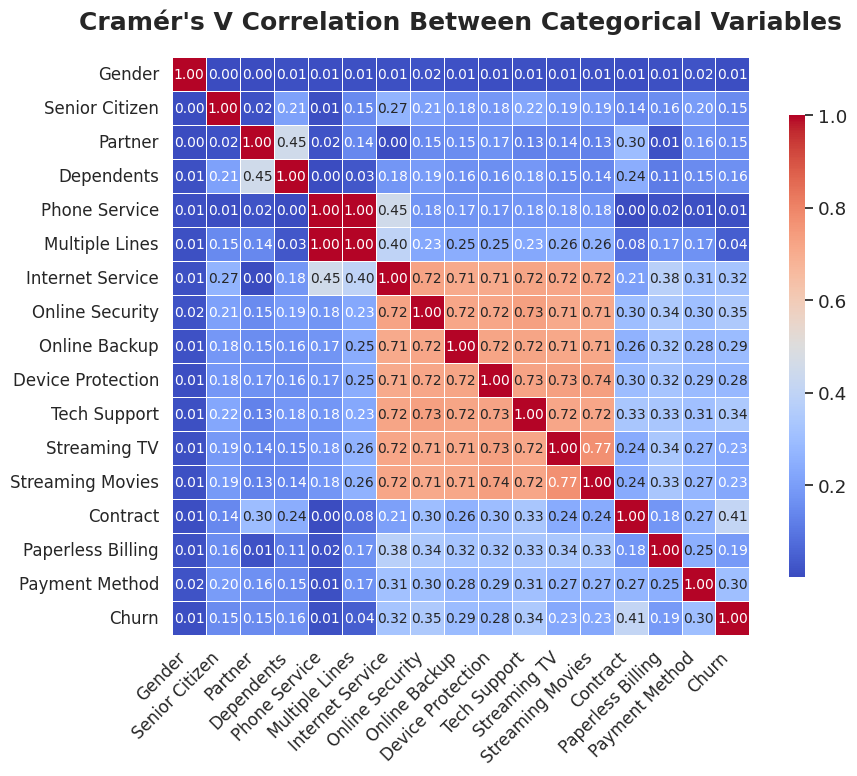

In [14]:
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if 'id' not in col.lower()]

cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

heatmap = sns.heatmap(cramers_results,
                    annot=True,
                    fmt=".2f",
                    cmap='coolwarm',
                    linewidths=0.5,
                    square=True,
                    cbar_kws={'shrink': 0.8, 'aspect': 30},
                    annot_kws={"size": 10})

plt.title("Cramér's V Correlation Between Categorical Variables", fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.grid(False)

plt.tight_layout()
plt.show()

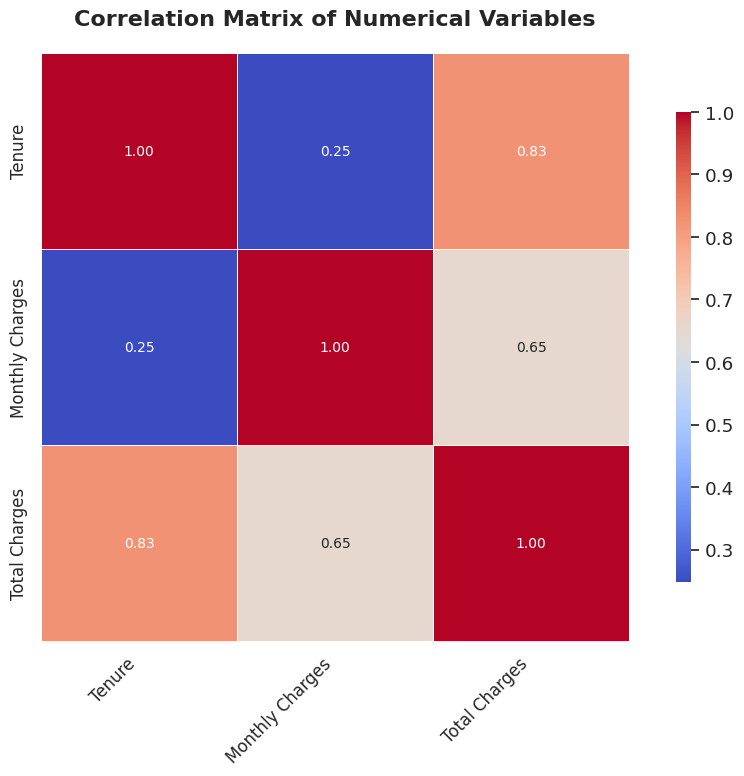

In [15]:
corr_matrix_numerical = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_numerical, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True,
            cbar_kws={'shrink': 0.8, 'aspect': 30}, annot_kws={"size": 10})

plt.title("Correlation Matrix of Numerical Variables", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
file_path = '/content/churn (1).csv'  # Replace with your dataset path
data = pd.read_csv(file_path)


In [20]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Example numeric columns
data[numeric_features] = data[numeric_features].apply(pd.to_numeric, errors='coerce')  # Handle non-numeric values
data = data.dropna(subset=numeric_features)  # Drop rows with missing values


In [21]:
# Step 1: Select Numeric Features for Clustering
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Example numeric columns
data[numeric_features] = data[numeric_features].apply(pd.to_numeric, errors='coerce')  # Handle non-numeric values
data = data.dropna(subset=numeric_features)  # Drop rows with missing values

In [22]:
# Step 2: Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_features])

In [23]:
# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with the desired number of clusters
data['Cluster'] = kmeans.fit_predict(X_scaled)


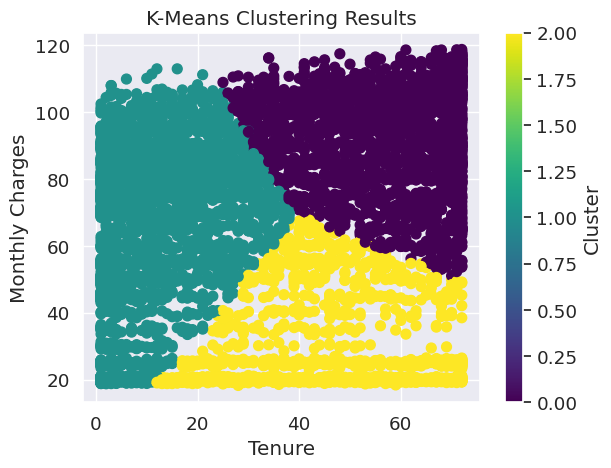

In [24]:
# Step 4: Visualize the Clusters (Scatterplot of two features)
plt.scatter(data['tenure'], data['MonthlyCharges'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()


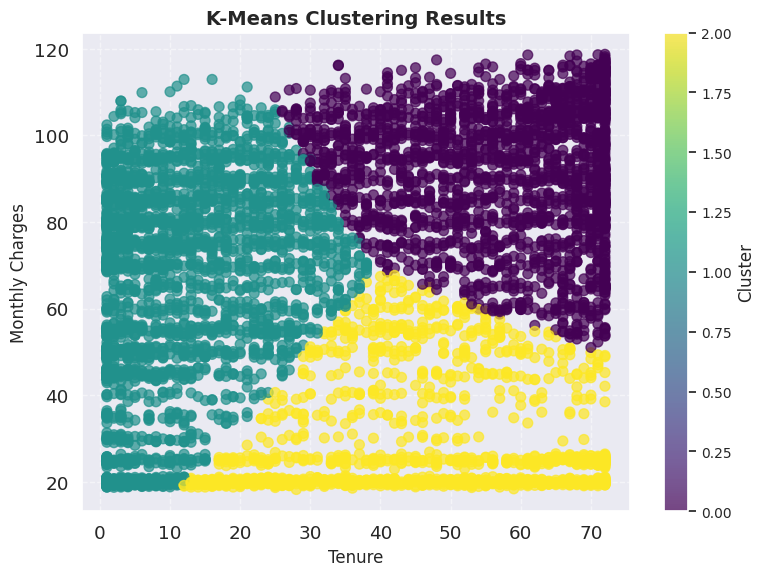

In [25]:
# Step 4: Visualize the Clusters (Scatterplot of two features)
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility

scatter = plt.scatter(data['tenure'], data['MonthlyCharges'], c=data['Cluster'],
                      cmap='viridis', s=50, alpha=0.7)  # alpha for transparency

plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)
plt.title('K-Means Clustering Results', fontsize=14, fontweight='bold')

# Add colorbar for cluster identification
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster', fontsize=12)
cbar.ax.tick_params(labelsize=10)  # Adjust tick label size

plt.grid(True, linestyle='--', alpha=0.5)  # Optional: Add a grid
plt.tight_layout()
plt.show()

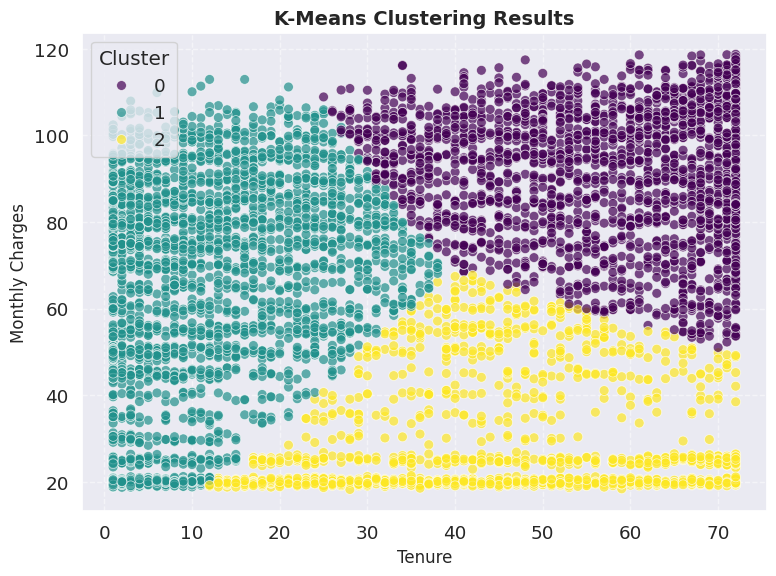

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your previous code for scaling and clustering) ...

# Step 4: Visualize the Clusters (Scatterplot of two features)
plt.figure(figsize=(8, 6))

sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', data=data,
                palette='viridis', s=50, alpha=0.7)

plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)
plt.title('K-Means Clustering Results', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()